In [ ]:
import numpy as np
import pandas as pd

from keras.datasets import cifar10
from sklearn.neural_network import MLPClassifier
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from keras.layers import Dropout
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Reshaping the data so that t can be fit into MLP classifier

In [ ]:
X_train=X_train.reshape(-1,3072)

In [ ]:
X_test=X_test.reshape(-1,3072)

Preprocessing the data

In [ ]:
 X_train = X_train.astype("float32") / 255

In [ ]:
X_train

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

In [ ]:
X_test = X_test.astype("float32") / 255

In [ ]:
y_train=y_train.reshape(-1)

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
X=np.concatenate((X_train, X_test), axis=0)
X

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.07843138, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843138,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078432, 0.47058824,
        0.3137255 ],
       [0.28627452, 0.30588236, 0.29411766, ..., 0.10588235, 0.10196079,
        0.10196079]], dtype=float32)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
X.shape

(60000, 3072)

In [ ]:
y=np.concatenate((y_train, y_test), axis=0)
y

array([6, 9, 9, ..., 5, 1, 7], dtype=uint8)

In [ ]:
y[50000:]

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
y.shape

(60000,)

In [ ]:
lda = LinearDiscriminantAnalysis()
newlda=lda.fit_transform(X,y)
newlda

array([[ 1.83151455, -1.74718696, -0.14908807, ..., -1.39322008,
         0.08891678, -0.17417244],
       [-1.43774066, -0.83969404,  0.61648247, ...,  1.18555974,
         0.41016099, -0.99411408],
       [-2.12395246, -0.51622921,  0.32076794, ...,  0.06785945,
        -0.68078304,  1.08862582],
       ...,
       [ 1.53098945,  0.3906611 , -0.32405058, ...,  0.70792814,
        -0.25994758,  0.84665418],
       [ 0.53331286, -0.88488895, -0.81235965, ...,  0.9296061 ,
         1.07468137, -0.36559309],
       [ 0.5834912 ,  1.03283111,  0.73942996, ...,  1.18051261,
         0.22681207,  0.24457671]])

In [ ]:
newlda

,0,1,2,3,4,5,6,7,8
0,1.831515,-1.747187,-0.149088,0.501044,-0.581164,0.242916,-1.393220,0.088917,-0.174172
1,-1.437741,-0.839694,0.616482,1.873415,0.239235,-1.062732,1.185560,0.410161,-0.994114
2,-2.123952,-0.516229,0.320768,-2.828314,-0.097479,0.842794,0.067859,-0.680783,1.088626
3,0.984618,-1.407486,-0.854844,-0.124387,-1.115774,-0.741937,-0.631171,0.630945,0.524816
4,-2.120086,-0.711872,-0.025417,-0.993286,-0.183469,-0.223199,1.370225,-0.222635,0.363696
...,...,...,...,...,...,...,...,...,...
59995,-1.105696,0.169845,-1.101910,0.667714,-1.010158,-0.739507,0.516277,1.736384,0.653153
59996,1.085464,-0.385151,0.501110,-1.188347,-1.492376,-1.551850,-0.510910,-0.562201,3.770143
59997,1.530989,0.390661,-0.324051,0.109324,-0.672120,0.199182,0.707928,-0.259948,0.846654
59998,0.533313,-0.884889,-0.812360,0.826079,0.019665,-0.441773,0.929606,1.074681,-0.365593


In [ ]:
fet1,fet2,fet3,fet4,fet5,fet6,fet7,fet8,fet9=lda.explained_variance_ratio_

In [ ]:
fet1

0.37497580120223173

In [ ]:
fet1+fet2+fet3+fet4+fet5+fet6+fet7+fet8+fet9

1.0

In [ ]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split( lda_df, y, test_size=(1/6), random_state=42)

In [ ]:
X_train_lda.shape

(50000, 9)

In [ ]:

model_lda = Sequential()

#Input Layer
model_lda.add(Dense(X_train_lda.shape[1], activation='relu', input_dim = X_train_lda.shape[1]))

#Hidden Layer

model_lda.add(Dense(10, activation='relu'))



#output layer
model_lda.add(Dense(10, activation = 'sigmoid'))

model_lda.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_lda.fit(X_train_lda, y_train_lda, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2328 - accuracy: 0.2008
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8231 - accuracy: 0.3540
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6660 - accuracy: 0.4292
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5832 - accuracy: 0.4615
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5429 - accuracy: 0.4700
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5177 - accuracy: 0.4799
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5034 - accuracy: 0.4873
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4975 - accuracy: 0.4885
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4844 - accuracy: 0.4940
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.486

In [ ]:
y_predict_lda = model_lda.predict(X_test_lda)

In [ ]:
predicted_class_lda = [np.argmax(element) for element in y_predict_lda]

In [ ]:
y_predict_lda

array([[0.9956969 , 0.9510304 , 0.48959076, ..., 0.19009733, 0.98724294,
        0.8492155 ],
       [0.92303646, 0.3004247 , 0.6846856 , ..., 0.31911618, 0.80303085,
        0.37158978],
       [0.46286333, 0.3100196 , 0.9958122 , ..., 0.61593986, 0.5460419 ,
        0.3224622 ],
       ...,
       [0.45616305, 0.46594197, 0.44334185, ..., 0.74286795, 0.56242055,
        0.92821443],
       [0.48205963, 0.3349033 , 0.8220947 , ..., 0.72667766, 0.21135691,
        0.2500804 ],
       [0.3833829 , 0.4246443 , 0.6623999 , ..., 0.82210946, 0.08334565,
        0.6439712 ]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_MLP_lda= accuracy_score(predicted_class_lda,y_test_lda)
accuracy_MLP_lda

0.501

In [ ]:
print("Classification Report: \n", classification_report(y_test_lda,predicted_class_lda))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.56      0.55       993
           1       0.55      0.58      0.57       979
           2       0.38      0.44      0.41      1008
           3       0.43      0.38      0.40      1066
           4       0.46      0.39      0.42       977
           5       0.47      0.42      0.44      1008
           6       0.46      0.60      0.52       950
           7       0.56      0.55      0.56      1025
           8       0.60      0.54      0.57       995
           9       0.56      0.58      0.57       999

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.75)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.75, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
new_X = pca.transform(X)
new_X = pd.DataFrame(new_X)

In [ ]:
new_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-6.440081,2.722950,1.474127,3.641109,-3.909117,0.581503,-0.611310,0.139462,3.478954,1.142491,0.368658,-0.103668,0.298230,0.500313,0.488314,-0.657091,-0.582482,0.358689,0.654774,-0.537266,-0.849663
1,0.784991,-0.962687,5.996037,-1.255510,-1.590010,1.152211,-0.660616,-0.443221,2.575090,2.499983,-3.141834,-1.208642,-0.905812,0.929253,0.804139,1.961017,-0.397212,1.997981,0.640499,3.083527,1.111255
2,7.703461,-11.525579,-2.776021,-2.049103,-1.911783,-2.176727,0.754897,-1.397314,-0.678302,-1.043811,3.005564,0.766500,1.644383,-0.875020,-1.761458,-1.030598,0.748411,0.972276,-0.212102,-1.980734,-1.123676
3,-10.382980,0.010114,1.068128,1.557536,-1.357623,0.837998,-0.249747,0.251159,1.460290,-0.366572,0.330905,-1.117495,-0.735023,-1.398312,0.838421,0.129408,-0.175971,0.984060,1.203884,-0.218894,-1.054724
4,-2.666208,-4.976683,1.024970,-3.518757,0.722494,-0.363712,-5.545829,1.559535,3.915226,-1.990751,-2.244325,-0.389686,-3.239236,-0.744419,-1.573423,-0.548066,0.190272,-2.023464,0.641144,0.875717,-1.243161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4.447512,8.756063,10.062285,1.239530,2.882130,-3.723588,-1.172055,-6.177209,0.588477,-2.743876,3.750835,-2.901569,-0.228171,0.932809,-0.170054,-0.197960,-0.751411,-0.849920,-0.468989,3.396048,-1.889983
59996,-3.633442,8.047703,-0.612539,-1.441757,-2.259633,-1.025059,0.052041,-1.214899,-0.263247,0.368202,-1.171163,1.806591,-1.271428,0.667891,0.269811,-1.242682,-1.006890,0.418375,0.239644,0.562260,-0.995804
59997,-15.313474,2.507805,-0.269547,0.820814,3.273327,-4.032594,0.961239,0.560168,-1.877239,0.547139,3.112988,1.419754,-2.202723,0.502138,-0.075596,1.385177,-0.459253,-0.782107,-0.742663,2.523060,-0.452914
59998,-5.898956,2.029377,3.636821,0.222106,-0.527822,-1.732590,0.164358,-0.204557,2.117616,0.420965,0.192663,-1.542888,-0.091820,-0.599000,1.021304,0.757056,1.673560,0.387966,0.786148,-2.995287,-0.053366


In [ ]:
fet_sum=0
for i in range(21):
  ft = pca.explained_variance_ratio_[i]
  fet_sum+=ft
fet_sum

0.7502413196489215

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( new_X, y, test_size=(1/6), random_state=42)

In [ ]:
model_pca = Sequential()

#Input Layer
model_pca.add(Dense(X_train_pca.shape[1], activation='relu', input_dim = X_train_pca.shape[1]))

#Hidden Layer

model_pca.add(Dense(10, activation='relu'))



#output layer
model_pca.add(Dense(10, activation = 'sigmoid'))

model_pca.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_pca.fit(X_train_pca, y_train_pca, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.1924 - accuracy: 0.1922
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9083 - accuracy: 0.2875
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8492 - accuracy: 0.3218
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7994 - accuracy: 0.3489
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7617 - accuracy: 0.3650
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7323 - accuracy: 0.3716
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7178 - accuracy: 0.3802
Epoch 8/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7146 - accuracy: 0.3835
Epoch 9/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7059 - accuracy: 0.3834
Epoch 10/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.690

In [ ]:
y_predict_pca = model_pca.predict(X_test_pca)

In [ ]:
predicted_class_pca = [np.argmax(element) for element in y_predict_pca]

In [ ]:
accuracy_MLP_pca= accuracy_score(predicted_class_pca,y_test_pca)
accuracy_MLP_pca

0.4063

In [ ]:
print("Classification Report: \n", classification_report(y_test_pca,predicted_class_pca))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.43      0.46       993
           1       0.44      0.44      0.44       979
           2       0.34      0.33      0.33      1008
           3       0.30      0.32      0.31      1066
           4       0.36      0.33      0.35       977
           5       0.44      0.23      0.30      1008
           6       0.37      0.52      0.43       950
           7       0.45      0.49      0.47      1025
           8       0.50      0.50      0.50       995
           9       0.40      0.48      0.44       999

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.40     10000
weighted avg       0.41      0.41      0.40     10000



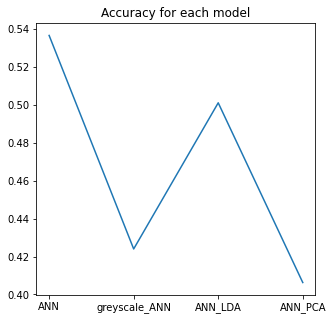

In [ ]:
Model_list=["ANN","greyscale_ANN","ANN_LDA","ANN_PCA"]
Accuracy_list=[0.5365,0.424, 0.501,0.4063]
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
plt.title('Accuracy for each model')

sns.lineplot(x=Model_list, y=Accuracy_list)